In [1]:
import pandas as pd

data = pd.read_csv("../Data/Processed/processed.csv")

In [2]:
from sklearn.cluster import KMeans
 
method_used = KMeans

In [4]:

from sklearn.metrics import silhouette_score

silhouette_scores = []
silhouette_scores_avg = []
n_clusters_range = range(2,10)
iterations_per_n = 100

for n_clusters in n_clusters_range:

    silhouette_scores_given_n = []

    for i in range(iterations_per_n):
        prediction = method_used(n_clusters=n_clusters).fit_predict(data)
        sc = silhouette_score(data, prediction)

        silhouette_scores.append((n_clusters,sc))
        silhouette_scores_given_n.append(sc)

    silhouette_scores_avg.append((n_clusters, sum(silhouette_scores_given_n)/len(silhouette_scores_given_n)))



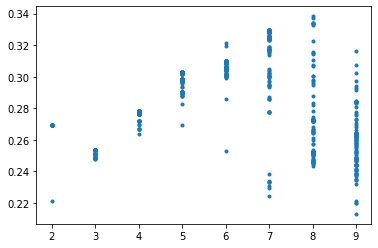

In [7]:
import matplotlib.pyplot as plt

sc_xs, sc_ys = zip(*silhouette_scores)

plt.plot(sc_xs, sc_ys, '.')

<AxesSubplot:>

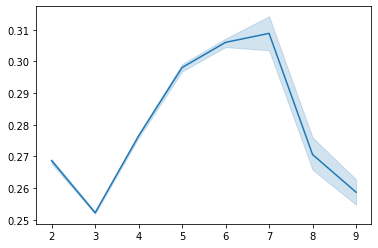

In [8]:
import seaborn as sns

sns.lineplot(x=sc_xs, y=sc_ys)